In [1]:
import ee
from datetime import date
import folium
import geemap
import ipyleaflet

In [ ]:
# The output is an Image.  Add it to the map.
vis_param = {'bands': ['T_LST_DEM'], 'gamma': 0.4}
ndviParams = {'bands':["ET_24h"],'min': 0, 'max': 3, 'dimensions': 512, 
    'palette': ['red',"orange","green"]}
median_tk = ls_trial.getMapId(ndviParams)


center = [33.533251, -114.592994]
Mapdisplay(center,{'Landsat 8':median_tk},zoom_start=9)

In [ ]:
# The output is an Image.  Add it to the map.
vis_param = {'bands': ['T_LST_DEM'], 'gamma': 0.4}
ndviParams = {'bands':["LE"],'min': 30, 'max': 350, 'dimensions': 512, 
    'palette':   ['red',"orange","green","blue"]}
median_tk = ls_trial.getMapId(ndviParams)

center = [33.533251, -114.592994]
Mapdisplay(center,{'Landsat 8':median_tk},zoom_start=9)

In [ ]:
et=image.Image(ls.first())
et.getInfo()

In [ ]:
# The output is an Image.  Add it to the map.
vis_param = {'bands': ['T_LST_DEM'], 'gamma': 0.4}
ndviParams = {'bands':["NDVI"],'min': 0, 'max': 1, 'dimensions': 512, 
    'palette':   ['brown',"orange","green","blue"]}
median_tk = ls_trial.getMapId(ndviParams)

center = [33.533251, -114.592994]
Mapdisplay(center,{'Landsat 8':median_tk},zoom_start=9)

In [2]:
import sys
sys.path.append('C:\\Rouhin_Lenovo\\US_project\\Alfalfa\\ET_Code\\geeSEBAL-master\\etbrasil\\')
import geesebal

In [3]:
from geesebal import (tools,landsatcollection,masks,meteorology,endmembers, 
evapotranspiration,collection,timeseries,image)

### Get the landsat collectioin

In [4]:
ls=ee.ImageCollection('LANDSAT/LC08/C01/T1_SR').filterDate("2021-02-01","2021-12-31").filterMetadata('WRS_PATH', 'equals', 38).filterMetadata('WRS_ROW', 'equals',37).filterMetadata('CLOUD_COVER', 'less_than', 10);
ls.first().bandNames().getInfo()

['B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B10',
 'B11',
 'sr_aerosol',
 'pixel_qa',
 'radsat_qa']

In [5]:
# et=image.Image(ls.first())
NDVI_cold=5
Ts_cold=20
NDVI_hot=10
Ts_hot=20
index=ls.first().get('system:index')
cloud_cover=ls.first().get('CLOUD_COVER')
LANDSAT_ID=ls.first().get('LANDSAT_ID').getInfo()
landsat_version=ls.first().get('SATELLITE').getInfo()
azimuth_angle=ls.first().get('SOLAR_ZENITH_ANGLE')
time_start=ls.first().get('system:time_start')
date=ee.Date(time_start)
year=ee.Number(date.get('year'))
month=ee.Number(date.get('month'))
day=ee.Number(date.get('day'))
hour=ee.Number(date.get('hour'))
minuts = ee.Number(date.get('minutes'))
crs = ls.first().projection().crs()
transform=ee.List(ee.Dictionary(ee.Algorithms.Describe(ls.first().projection())).get('transform'))
date_string=date.format('YYYY-MM-dd').getInfo()
#ENDMEMBERS
p_top_NDVI=ee.Number(NDVI_cold)
p_coldest_Ts=ee.Number(Ts_cold)
p_lowest_NDVI=ee.Number(NDVI_hot)
p_hottest_Ts=ee.Number(Ts_hot)

In [6]:
print(hour.getInfo())
# print(hour.getInfo())
print(minuts.getInfo())
print(LANDSAT_ID)
print(cloud_cover.getInfo())

18
10
LC08_L1TP_038037_20210207_20210305_01_T1
2.33


In [7]:
index.getInfo()
azimuth_angle.getInfo()

53.837925

In [8]:
ls_trial=ls.first().select([0,1,2,3,4,5,6,7,10], ["UB","B","GR","R","NIR","SWIR_1","SWIR_2","BRT","pixel_qa"])
ls.first_toa=ee.Image('LANDSAT/LC08/C01/T1/'+index.getInfo())

col_rad = ee.Algorithms.Landsat.calibratedRadiance(ls.first_toa)
col_rad = ls_trial.addBands(col_rad.select([9],["T_RAD"]))
#CLOUD REMOVAL
# ls_trial=ee.ImageCollection(col_rad).map(masks.f_cloudMaskL8_SR)
ls_trial=masks.f_cloudMaskL8_SR(ls_trial)
#ALBEDO TASUMI ET AL. (2008) METHOD WITH KE ET AL. (2016) COEFFICIENTS
# ls_trial=ls_trial.map(masks.f_albedoL8)
ls_trial=masks.f_albedoL8(ls_trial)


In [9]:
ls_trial.getInfo()

{'type': 'Image',
 'bands': [{'id': 'UB',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': -32768,
    'max': 32767},
   'dimensions': [7541, 7691],
   'crs': 'EPSG:32611',
   'crs_transform': [30, 0, 660585, 0, -30, 3789615]},
  {'id': 'B',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': -32768,
    'max': 32767},
   'dimensions': [7541, 7691],
   'crs': 'EPSG:32611',
   'crs_transform': [30, 0, 660585, 0, -30, 3789615]},
  {'id': 'GR',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': -32768,
    'max': 32767},
   'dimensions': [7541, 7691],
   'crs': 'EPSG:32611',
   'crs_transform': [30, 0, 660585, 0, -30, 3789615]},
  {'id': 'R',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': -32768,
    'max': 32767},
   'dimensions': [7541, 7691],
   'crs': 'EPSG:32611',
   'crs_transform': [30, 0, 660585, 0, -30, 3789615]},
  {'id': 'NIR',
   'data_type': {'type': 'PixelType',
    'precision': 'int

In [10]:
#------ Meteorology
  #GEOMETRY
geometryReducer=ls_trial.geometry().bounds().getInfo()
geometry_download=geometryReducer['coordinates']
# camada_clip=ls_trial.select('BRT').first()
camada_clip=ls_trial.select('BRT')
sun_elevation=ee.Number(90).subtract(ee.Number(azimuth_angle))
#METEOROLOGY PARAMETERS
col_meteorology= meteorology.get_meteorology(ls_trial,time_start);

#AIR TEMPERATURE [C]
T_air = col_meteorology.select('AirT_G');

#WIND SPEED [M S-1]
ux= col_meteorology.select('ux_G');

#RELATIVE HUMIDITY [%]
UR = col_meteorology.select('RH_G');

#NET RADIATION 24H [W M-2]
Rn24hobs = col_meteorology.select('Rn24h_G');
#------
#------ Elevation
#SRTM DATA ELEVATION
SRTM_ELEVATION ='USGS/SRTMGL1_003'
srtm = ee.Image(SRTM_ELEVATION).clip(geometryReducer);
z_alt = srtm.select('elevation')

#GET IMAGE
# ls_trial=ls_trial.first()

#SPECTRAL IMAGES (NDVI, EVI, SAVI, LAI, T_LST, e_0, e_NB, long, lat)
ls_trial=tools.fexp_spec_ind(ls_trial)
ls_trial.getInfo()
ls_trial=tools.LST_DEM_correction(ls_trial, z_alt, T_air, UR,sun_elevation,hour,minuts)
#COLD PIXEL
d_cold_pixel=endmembers.fexp_cold_pixel(ls_trial, geometryReducer, p_top_NDVI, p_coldest_Ts)
#COLD PIXEL NUMBER
n_Ts_cold = ee.Number(d_cold_pixel.get('temp').getInfo())
#INSTANTANEOUS OUTGOING LONG-WAVE RADIATION [W M-2]
ls_trial=tools.fexp_radlong_up(ls_trial)

#INSTANTANEOUS INCOMING SHORT-WAVE RADIATION [W M-2]
ls_trial=tools.fexp_radshort_down(ls_trial,z_alt,T_air,UR, sun_elevation)

#INSTANTANEOUS INCOMING LONGWAVE RADIATION [W M-2]
ls_trial=tools.fexp_radlong_down(ls_trial, n_Ts_cold)

#INSTANTANEOUS NET RADIATON BALANCE [W M-2]
ls_trial=tools.fexp_radbalance(ls_trial)

#SOIL HEAT FLUX (G) [W M-2]
ls_trial=tools.fexp_soil_heat(ls_trial)
#HOT PIXEL
d_hot_pixel=endmembers.fexp_hot_pixel(ls_trial, geometryReducer,p_lowest_NDVI, p_hottest_Ts)
#SENSIBLE HEAT FLUX (H) [W M-2]
ls_trial,list_dif,list_coef_a,list_coef_b,list_dT_hot,list_rah_hot=tools.fexp_sensible_heat_flux(ls_trial, ux, UR,Rn24hobs,n_Ts_cold,
                               d_hot_pixel, date_string,geometryReducer)

#DAILY EVAPOTRANSPIRATION (ET_24H) [MM DAY-1]
ls_trial=evapotranspiration.fexp_et(ls_trial,Rn24hobs)

NAME_FINAL=LANDSAT_ID[:5]+LANDSAT_ID[10:17]+LANDSAT_ID[17:25]
ls_trial=ls_trial.addBands([ls_trial.select('ET_24h').rename(NAME_FINAL)])



In [23]:
import pandas as pd
n_dif=pd.Series(list_dif.getInfo())
a=pd.Series(list_coef_a.getInfo())
b=pd.Series(list_coef_b.getInfo())
dT_hot=pd.Series(list_dT_hot.getInfo())
rah_hot=pd.Series(list_rah_hot.getInfo())
iterate=pd.DataFrame()
iterate['n_dif']=n_dif
iterate['a']=a
iterate['b']=b
iterate['dt_hot']=dT_hot
iterate["rah_hot"]=rah_hot

In [25]:
iterate.to_csv("C:\\Rouhin_Lenovo\\US_project\\Alfalfa\\figures\\Iterate_15.csv")

In [11]:
ls_trial.getInfo()
col_meteorology.getInfo()
print(d_cold_pixel.getInfo())

{'ndvi': 0.8386970162391663, 'sum': 430584, 'temp': 291.45082293333246, 'x': -114.73838748972216, 'y': 33.45952748628739}


In [ ]:
print(d_cold_pixel.getInfo())

### Trying it out with landsat level 2 SR product 


### Plotting with GEEMAP

In [12]:
import geemap.colormaps as cm
cm.palettes.jet

<Box: {'default': ('000080', '000084', '000089', '00008d', '000092', '000096', '00009b', '00009f', '0000a4', '0000a8', '0000ad', '0000b2', '0000b6', '0000bb', '0000bf', '0000c4', '0000c8', '0000cd', '0000d1', '0000d6', '0000da', '0000df', '0000e3', '0000e8', '0000ed', '0000f1', '0000f6', '0000fa', '0000ff', '0000ff', '0000ff', '0000ff', '0000ff', '0004ff', '0008ff', '000cff', '0010ff', '0014ff', '0018ff', '001cff', '0020ff', '0024ff', '0028ff', '002cff', '0030ff', '0034ff', '0038ff', '003cff', '0040ff', '0044ff', '0048ff', '004cff', '0050ff', '0054ff', '0058ff', '005cff', '0060ff', '0064ff', '0068ff', '006cff', '0070ff', '0074ff', '0078ff', '007cff', '0080ff', '0084ff', '0088ff', '008cff', '0090ff', '0094ff', '0098ff', '009cff', '00a0ff', '00a4ff', '00a8ff', '00acff', '00b0ff', '00b4ff', '00b8ff', '00bcff', '00c0ff', '00c4ff', '00c8ff', '00ccff', '00d0ff', '00d4ff', '00d8ff', '00dcfe', '00e0fb', '00e4f8', '02e8f4', '06ecf1', '09f0ee', '0cf4eb', '0ff8e7', '13fce4', '16ffe1', '19ffde', '

In [13]:
Map = geemap.Map(center=[33.533251, -114.592994], zoom=4)
vis_params = {
  'min': 0,
  'max': 0.4,
  'palette':cm.palettes.RdYlBu}

ndviParams = {'min': 0, 'max': 3, 'dimensions': 512, 
    'palette': ['red',"orange","green"]}
Map.addLayer(ls_trial, {'bands': ["ALFA"], 'min': 0, 'max': 0.4, 'palette': cm.palettes.RdYlBu}, 'Landsat 7')

Map.add_colorbar(vis_params)
Map

The provided color (default) is invalid. Using the default black color.
'#default' is not in web format. Need 3 or 6 hex digit.
The provided color (n03) is invalid. Using the default black color.
'#n03' is not in web format. Need 3 or 6 hex digit.
The provided color (n04) is invalid. Using the default black color.
'#n04' is not in web format. Need 3 or 6 hex digit.
The provided color (n05) is invalid. Using the default black color.
'#n05' is not in web format. Need 3 or 6 hex digit.
The provided color (n06) is invalid. Using the default black color.
'#n06' is not in web format. Need 3 or 6 hex digit.
The provided color (n07) is invalid. Using the default black color.
'#n07' is not in web format. Need 3 or 6 hex digit.
The provided color (n08) is invalid. Using the default black color.
'#n08' is not in web format. Need 3 or 6 hex digit.
The provided color (n09) is invalid. Using the default black color.
'#n09' is not in web format. Need 3 or 6 hex digit.
The provided color (n10) is inva

Map(center=[33.533251, -114.592994], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HB…

In [15]:
SW=col_meteorology.select("SW_Down").clip(geometryReducer)
Tair=T_air.select('AirT_G').clip(geometryReducer)
ls_trial .getInfo()
t=ls_trial.select("T_LST_DEM")
t=t.updateMask(ls_trial.select("NDWI").lte(0)).rename('LST_NW')
t.getInfo()

{'type': 'Image',
 'bands': [{'id': 'LST_NW',
   'data_type': {'type': 'PixelType', 'precision': 'double'},
   'dimensions': [7541, 7691],
   'crs': 'EPSG:32611',
   'crs_transform': [30, 0, 660585, 0, -30, 3789615]}],
 'id': 'LANDSAT/LC08/C01/T1_SR/LC08_038037_20210207',
 'version': 1615107354371747,
 'properties': {'IMAGE_QUALITY_TIRS': 9,
  'CLOUD_COVER': 2.33,
  'EARTH_SUN_DISTANCE': 0.986379,
  'LANDSAT_ID': 'LC08_L1TP_038037_20210207_20210305_01_T1',
  'system:footprint': {'type': 'LinearRing',
   'coordinates': [[-114.80299586718151, 34.2206496874067],
    [-114.81683920251037, 34.2231512861819],
    [-114.83209780487132, 34.168064430748046],
    [-114.85447116308508, 34.085517343445275],
    [-115.06407099084647, 33.29763643703634],
    [-115.27180133910076, 32.50061953363788],
    [-115.27183543445821, 32.49883714827245],
    [-115.13227786996805, 32.472488248912605],
    [-113.5245886499367, 32.15683874984157],
    [-113.34629020803301, 32.12045184082747],
    [-113.245952479

In [16]:
import matplotlib.pyplot as plt
from geemap import cartoee
import numpy as np
import cartopy as ccrs

In [ ]:
col_meteorology=col_meteorology.select('SW_Down').addBands([ls_trial.pixelLonLat()]);
# Solar Radiation Instatnatneous 
Map = geemap.Map(center=[33.533251, -114.592994], zoom=4)
vis_params = {
  'min':350,
  'max':700,
  'palette':cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False)}

ndviParams = {'min': 0, 'max': 3, 'dimensions': 512, 
    'palette': ['red',"orange","green"]}
Map.addLayer(ls_trial , {'bands': [ 'G'], 'min':50, 'max': 200,'palette': cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False)}, 'Landsat 7')

Map.add_colorbar(vis_params)
Map


In [ ]:
ls_trial.getInfo()

In [ ]:
ee.Image(0).getInfo()

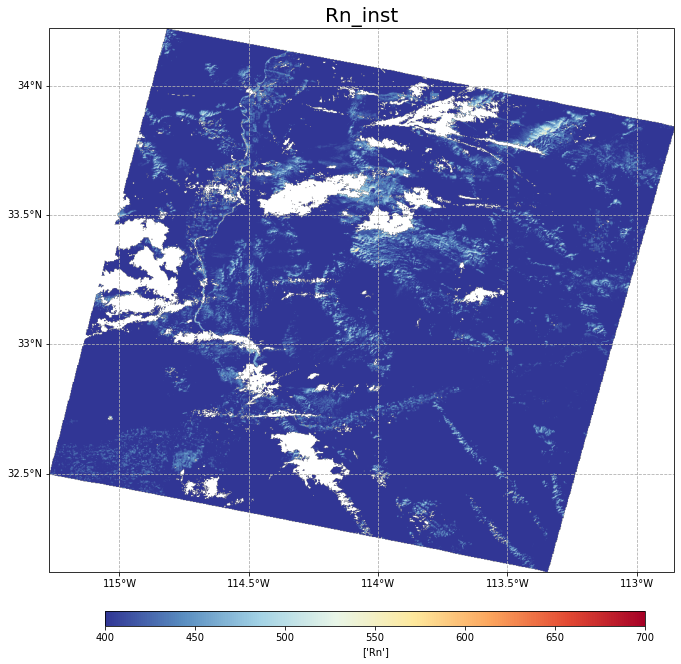

In [26]:
## Create function for plotting layers 
def plot_scenes(image,bands,minm,maxm,palette,name):
    fig = plt.figure(figsize=(15, 10))

    # here is the bounding box of the map extent we want to use
    # formatted a [E,S,W,N]
#     zoom_region = [-112.79, 32.049037,-115.368771, 34.32]
    vis_params = {"bands":bands,
      'min': minm,
      'max': maxm,
      'palette':palette}
    # plot the map over the region of interest
    ax = cartoee.get_map(image, vis_params=vis_params)

    # add the gridlines and specify that the xtick labels be rotated 45 degrees
    # add some styling to make our map publication ready

    clb=cartoee.add_colorbar(ax,loc='right',vis_params=vis_params,orientation="horizontal",posOpts=[0.25, 0.05, 0.5, 0.02])
    cartoee.add_gridlines(ax, interval=0.5, xtick_rotation=0, linestyle="--")
    ax.grid(False)
    # add coastline
    ax.coastlines(color="cyan")
    ax.set_title(label = name, fontsize=20)
#     plt.savefig("C:\\Rouhin_Lenovo\\US_project\\Alfalfa\\figures\\"+name+".png",bbox="tight",dpi=300)
# plot_scenes(ls_trial,["ALFA"],0,0.4,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"albedo")
# plot_scenes(SW,["SW_Down"],290,300,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"SW_daily")
# plot_scenes(Tair,['AirT_G'],15,25,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"Tair")
# plot_scenes(Rn24hobs,['Rn24h_G'],90,200,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"Rndaily")
# plot_scenes(ls_trial,['NDVI'],-0.1,0.8,cm.get_palette(cmap_name='RdYlGn', n_class=8, hashtag=False),"NDVI")
# plot_scenes(ls_trial,['SAVI'],-0.1,0.8,cm.get_palette(cmap_name='RdYlGn', n_class=8, hashtag=False),"SAVI")
# plot_scenes(ls_trial,['LAI'],0,3,cm.get_palette(cmap_name='RdYlGn', n_class=8, hashtag=False),"LAI")
# plot_scenes(ls_trial,['e_0'],0.95,0.953,cm.get_palette(cmap_name='RdYlBu', n_class=8, hashtag=False),"Broadband_e")
# plot_scenes(ls_trial,['NDWI'],-0.8,0.5,cm.get_palette(cmap_name='RdYlBu', n_class=8, hashtag=False),"NDWI")
# plot_scenes(ls_trial,['T_LST_DEM'],290,320,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"LST_corrected")
# plot_scenes(ls_trial,['T_LST'],290,320,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"LST")
# plot_scenes(ls_trial,['Rs_down'],800,900,cm.get_palette(cmap_name='YlOrRd', n_class=8, hashtag=False),"Rs_inst")
# plot_scenes(ls_trial,['Rl_up'],400,550,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"Rl_out")
# plot_scenes(ls_trial,['Rl_down'],330,335,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"Rl_in")
plot_scenes(ls_trial,['Rn'],400,700,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"Rn_inst")
# plot_scenes(ls_trial,['G'],0,150,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"G")
# plot_scenes(z_alt,['elevation'],0,800,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"elevation")
# plot_scenes(ls_trial,['zom'],0,0.1,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"zom")
# plot_scenes(ls_trial,['u_fr'],0,0.15,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"ufr")
# plot_scenes(ls_trial,['ET_24h'],0,3.5,cm.get_palette(cmap_name='RdYlBu', n_class=8, hashtag=False),"ET_daily")
# plot_scenes(ls_trial,['rah_first'],40,100,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"rah_first")
# plot_scenes(ls_trial,['rah'],0,50,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"rah_final")
# plot_scenes(ls_trial,['dT'],-2,8,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"dt_final")
# plot_scenes(ls_trial,['ufric_star'],0,0.3,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"ufric_final")
# plot_scenes(ls_trial,['ET_inst'],0,0.5,cm.get_palette(cmap_name='RdYlBu', n_class=8, hashtag=False),"ET_inst")
# plot_scenes(ls_trial,['H'],0,200,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"H")



In [ ]:
ls_trial.getInfo()

In [ ]:
## Create function for plotting layers 
a=ee.Feature(ee.Geometry.Point(-114.736906,33.439129 ))
b=ee.Feature(ee.Geometry.Point( -114.715314,33.547044 ))
def plot_scenes(image,bands,minm,maxm,palette,name):
    fig = plt.figure(figsize=(15, 10))

    # here is the bounding box of the map extent we want to use
    # formatted a [E,S,W,N]
    zoom_region = [-114.473913,33.402794,-114.770224,33.650576]
    vis_params = {"bands":bands,
      'min': minm,
      'max': maxm,
      'palette':palette}
    styling = {"color": 'red', "fillColor": '00000000'};
# plot the map over the region of interest
    ax = cartoee.get_map(image, vis_params=vis_params,region=zoom_region)
    cartoee.add_layer(ax,a,region=zoom_region)
    cartoee.add_layer(ax,b,region=zoom_region)

    # add the gridlines and specify that the xtick labels be rotated 45 degrees
    # add some styling to make our map publication ready

    clb=cartoee.add_colorbar(ax,loc='right',vis_params=vis_params,orientation="horizontal",posOpts=[0.25, 0.05, 0.5, 0.02])
#     cartoee.add_gridlines(ax, interval=0.5, xtick_rotation=0, linestyle="--")
#     clb.set_ticklabels()
    ax.grid(False)
#     ax.plot(33.439129, -114.736906 )
    # add coastline
    ax.coastlines(color="cyan")
    ax.set_title(label = name, fontsize=20)
    plt.savefig("C:\\Rouhin_Lenovo\\US_project\\Alfalfa\\figures\\Figure_zoomed\\"+name+".png",bbox="tight",dpi=300)
# plot_scenes(ls_trial,["ALFA"],0,0.4,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"albedo")
# plot_scenes(SW,["SW_Down"],190,200,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"SW_daily")
# plot_scenes(Tair,['AirT_G'],15,22,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"Tair")
# plot_scenes(Rn24hobs,['Rn24h_G'],60,100,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"Rndaily")
# plot_scenes(ls_trial,['NDVI'],-0.1,0.8,cm.get_palette(cmap_name='RdYlGn', n_class=8, hashtag=False),"NDVI")
# plot_scenes(ls_trial,['SAVI'],-0.1,0.8,cm.get_palette(cmap_name='RdYlGn', n_class=8, hashtag=False),"SAVI")
# plot_scenes(ls_trial,['LAI'],0,3,cm.get_palette(cmap_name='RdYlGn', n_class=8, hashtag=False),"LAI")
# plot_scenes(ls_trial,['e_0'],0.95,0.953,cm.get_palette(cmap_name='RdYlBu', n_class=8, hashtag=False),"Broadband_e")
# plot_scenes(ls_trial,['NDWI'],-0.8,0.5,cm.get_palette(cmap_name='RdYlBu', n_class=8, hashtag=False),"NDWI")
# plot_scenes(ls_trial,['T_LST_DEM'],290,300,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"LST_corrected")
# plot_scenes(ls_trial,['T_LST'],290,300,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"LST")
# plot_scenes(ls_trial,['LST_NW'],290,310,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"LST_mask")
# plot_scenes(ls_trial,['Rs_down'],600,650,cm.get_palette(cmap_name='YlOrRd', n_class=8, hashtag=False),"Rs_inst")
# plot_scenes(ls_trial,['Rl_up'],400,450,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"Rl_out")
# plot_scenes(ls_trial,['Rl_down'],290,300,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"Rl_in")
# plot_scenes(ls_trial,['Rn'],300,500,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"Rn_inst")
# plot_scenes(ls_trial,['G'],0,100,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"G")
# plot_scenes(ls_trial,['Rn'],300,500,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"Rn_Instantaneous")
# plot_scenes(ls_trial,['zom'],0,0.1,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"zom")
# plot_scenes(ls_trial,['u_fr'],0,0.25,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"ufr")
plot_scenes(ls_trial,['ET_24h'],0,3.5,cm.get_palette(cmap_name='RdYlBu', n_class=8, hashtag=False),"ET_daily")
# plot_scenes(ls_trial,['rah_first'],0,50,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"rah_first")
# plot_scenes(ls_trial,['rah'],0,50,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"rah_final")
# plot_scenes(ls_trial,['dT'],-2,8,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"dt_final")
# plot_scenes(ls_trial,['ufric_star'],0,0.25,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"ufric_final")
# plot_scenes(ls_trial,['ET_inst'],0,0.5,cm.get_palette(cmap_name='RdYlBu', n_class=8, hashtag=False),"ET_inst")
# plot_scenes(ls_trial,['H'],0,200,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"H")


In [ ]:
clb

In [ ]:
# 33.550576, -114.770224 33.422794, -114.673913
## Create function for plotting layers 
def plot_points(image,bands,minm,maxm,palette,name):
    fig = plt.figure(figsize=(15, 10))

    # here is the bounding box of the map extent we want to use
    # formatted a [E,S,W,N]
    zoom_region = [ -114.713538,33.544932, -114.719192,33.549005]
    vis_params = {"bands":bands,
      'min': minm,
      'max': maxm,
      'palette':palette}
    # plot the map over the region of interest
    ax = cartoee.get_map(image, vis_params=vis_params, region=zoom_region)
    cartoee.add_layer(ax,b,region=zoom_region)

    # add the gridlines and specify that the xtick labels be rotated 45 degrees
    # add some styling to make our map publication ready

    clb=cartoee.add_colorbar(ax,loc='right',vis_params=vis_params,orientation="horizontal",posOpts=[0.25, 0.05, 0.5, 0.02])
    cartoee.add_gridlines(ax, interval=0.5, xtick_rotation=0, linestyle="--")
    ax.grid(False)
    # add coastline
    ax.coastlines(color="cyan")
    ax.set_title(label = 'Landsat8 Albedo', fontsize=20)
    plt.savefig("C:\\Rouhin_Lenovo\\US_project\\Alfalfa\\figures\\"+name+".png",bbox="tight",dpi=300)
plot_points(ls_trial,["ALFA"],0.1,0.35,cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False),"albedo_points")

In [ ]:
# 33.550576, -114.770224 33.422794, -114.673913
## Create function for plotting layers 
def plot_points(image,bands,minm,maxm,name):
    fig = plt.figure(figsize=(15, 10))

    # here is the bounding box of the map extent we want to use
    # formatted a [E,S,W,N]
    zoom_region = [ -114.713538,33.544932, -114.719192,33.549005]
    vis_params = {"bands":bands,
      'min': minm,
      'max': maxm,
                  "gamma":1.3}
    # plot the map over the region of interest
    ax = cartoee.get_map(image, vis_params=vis_params, region=zoom_region)

    # add the gridlines and specify that the xtick labels be rotated 45 degrees
    # add some styling to make our map publication ready

#     clb=cartoee.add_colorbar(ax,loc='right',vis_params=vis_params,orientation="horizontal",posOpts=[0.25, 0.05, 0.5, 0.02])
    cartoee.add_gridlines(ax, interval=0.5, xtick_rotation=0, linestyle="--")
    ax.grid(False)
    # add coastline
    ax.coastlines(color="cyan")
    ax.set_title(label = 'Landsat8 Albedo', fontsize=20)
    plt.savefig("C:\\Rouhin_Lenovo\\US_project\\Alfalfa\\figures\\"+name+".png",bbox="tight",dpi=300)
plot_points(ls_trial,["R","GR","B"],100,6500,"rgb_points")

In [ ]:
fig = plt.figure(figsize=(15, 10))

# here is the bounding box of the map extent we want to use
# formatted a [E,S,W,N]
zoom_region = [-112.79, 32.049037,-115.368771, 34.32]
vis_params = {"bands":["R","GR","B"],
  'min': 500,
  'max': 3000,
              "gamma":1.3}
# plot the map over the region of interest
ax = cartoee.get_map(ls_trial, vis_params=vis_params, region=zoom_region)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
# add some styling to make our map publication ready

# clb=cartoee.add_colorbar(ax,loc='right',vis_params=vis_params,orientation="horizontal",posOpts=[0.25, 0.05, 0.5, 0.02])
cartoee.add_gridlines(ax, interval=0.5, xtick_rotation=0, linestyle="--")
ax.grid(False)
# add coastline
ax.coastlines(color="cyan")
ax.set_title(label = 'Landsat8 RGB', fontsize=20)
plt.savefig("C:\\Rouhin_Lenovo\\US_project\\Alfalfa\\figures\\RGB.png",bbox="tight",dpi=300)
# show()

In [ ]:
# Net Radiation  Instanataneous 
Map = geemap.Map(center=[33.533251, -114.592994], zoom=4)
vis_params = {
  'min': 50,
  'max': 250,
  'palette':cm.get_palette(cmap_name='RdYlBu', n_class=8, hashtag=False)}

ndviParams = {'min': 0, 'max': 3, 'dimensions': 512, 
    'palette': ['red',"orange","green"]}
Map.addLayer(col_meteorology, {'bands': ['Rn24h_G'], 'min': 50, 'max': 250, 'palette': cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False)}, 'Landsat 7')

Map.add_colorbar(vis_params)
Map

In [ ]:
cm.get_palette(cmap_name='RdYlBu', n_class=5, hashtag=False)

In [ ]:
Map = geemap.Map(center=[33.533251, -114.592994], zoom=4)
palette=cm.palettes.RdYlBu_r
vis_params = {
  'min': 290,
  'max':330,
  'palette':cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False)}

ndviParams = {'min': -1, 'max': 0.3, 'dimensions': 512, 
    'palette': ['red',"orange","green"]}
Map.add_colorbar(vis_params)

Map.addLayer(ls_trial, {'bands': ['T_LST_DEM'], 'min': 290, 'max': 330, 'palette': cm.palettes.RdYlBu_r}, 'Landsat 7')
Map

In [ ]:
ls_trial.getInfo()

In [ ]:
Map = geemap.Map(center=[33.533251, -114.592994], zoom=4)
palette=cm.palettes.RdYlBu_r
vis_params = {
  'min': -10,
  'max':500,
  'palette':cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False)}

Map.add_colorbar(vis_params)

Map.addLayer(srtm , {'bands': ['elevation'], 'min': -10, 'max': 500, 'palette': cm.palettes.RdYlBu_r}, 'Landsat 7')
Map

In [ ]:
Map = geemap.Map(center=[33.533251, -114.592994], zoom=4)
palette=cm.palettes.RdYlBu_r
vis_params = {
  'min': 290,
  'max':330,
  'palette':cm.get_palette(cmap_name='RdYlBu_r', n_class=8, hashtag=False)}

ndviParams = {'min': -1, 'max': 0.3, 'dimensions': 512, 
    'palette': ['red',"orange","green"]}
# Map.add_colorbar(vis_params)

Map.addLayer(ls_trial, {'bands': ['BRT'], 'min':2500, 'max': 3500, 'palette': cm.palettes.RdYlBu_r}, 'Landsat 7')
Map

In [ ]:
ls_trial.getInfo()

In [ ]:
print(d_cold_pixel.getInfo())
print(n_Ts_cold.getInfo())
print(d_hot_pixel.getInfo())

In [ ]:
# import the cartoee functionality from geemap
from geemap import cartoee
# get an image
srtm = ee.Image("CGIAR/SRTM90_V4")


## Plottingwith folium

In [ ]:
# Define the URL format used for Earth Engine generated map tiles.
EE_TILES = 'https://earthengine.googleapis.com/map/{mapid}/{{z}}/{{x}}/{{y}}?token={token}'

print('Folium version: ' + folium.__version__)
#@title Mapdisplay: Display GEE objects using folium.
def Mapdisplay(center, dicc, Tiles="OpensTreetMap",zoom_start=10):
    '''
    :param center: Center of the map (Latitude and Longitude).
    :param dicc: Earth Engine Geometries or Tiles dictionary
    :param Tiles: Mapbox Bright,Mapbox Control Room,Stamen Terrain,Stamen Toner,stamenwatercolor,cartodbpositron.
    :zoom_start: Initial zoom level for the map.
    :return: A folium.Map object.
    '''
    mapViz = folium.Map(location=center,tiles=Tiles, zoom_start=zoom_start)
    for k,v in dicc.items():
      if ee.image.Image in [type(x) for x in v.values()]:
        folium.TileLayer(
            tiles = v["tile_fetcher"].url_format,
            attr  = 'Google Earth Engine',
            overlay =True,
            name  = k
          ).add_to(mapViz)
      else:
        folium.GeoJson(
        data = v,
        name = k
          ).add_to(mapViz)
    mapViz.add_child(folium.LayerControl())
    return mapViz

In [ ]:
# The output is an Image.  Add it to the map.
vis_param = {'bands': ['ALFA'], 'min':0,'max':0.4,'palette': ["green","orange",]}

median_tk = ls_trial.getMapId(vis_param)


center = [33.533251, -114.592994]
Mapdisplay(center,{'Landsat 8':median_tk},zoom_start=9) 